<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/selic/Selic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selic Meta
Analisar a evolução histórica da taxa Selic nos últimos 30 anos, incluindo a coleta, carregamento, pré-processamento e visualização dos dados.**negrito**

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos da taxa Selic.


**Reasoning**:
Search for reliable data sources for the Selic rate history and identify the access method and data format.



In [1]:
%pip install python-bcb

## Coleta de dados em partes

### Subtask:
Coletar os dados históricos da taxa Selic em múltiplos períodos de 5 anos usando o pacote `python-bcb`.


In [20]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the end date as today
end_date = datetime.now()

# Define the start date for the last 30 years
# Changed start date to January 1, 1995 as requested
start_date_overall = datetime(1995, 1, 1)

# List to store dataframes for each 5-year period
dfs_selic = []

# Define the period length in years
period_years = 5

# Loop through 5-year periods backwards from the end date
current_end_date = end_date
while current_end_date > start_date_overall:
    current_start_date = max(start_date_overall, current_end_date - timedelta(days=period_years * 365))

    print(f"Attempting to retrieve data from {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        df_period = sgs.get(('selic', 432), start=current_start_date.strftime('%Y-%m-%d'), end=current_end_date.strftime('%Y-%m-%d'))

        if not df_period.empty:
            print(f"Data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")
            dfs_selic.append(df_period)
        else:
            print(f"No data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving data for the period {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period
    current_end_date = current_start_date - timedelta(days=1) # Start the next period the day before

print(f"Collected {len(dfs_selic)} dataframes for different periods.")

Attempting to retrieve data from 2020-10-13 to 2025-10-12


KeyboardInterrupt: 

## Combinar os dados coletados

### Subtask:
Juntar os DataFrames de cada período em um único DataFrame.

In [ ]:
# Check if the list of dataframes is not empty
if dfs_selic:
    # Concatenate all dataframes in the list
    # sort_index() is important to ensure the combined dataframe is in chronological order
    df_selic_combined = pd.concat(dfs_selic).sort_index()

    print("DataFrames combinados com sucesso!")
    print("\nInformações do DataFrame combinado:")
    df_selic_combined.info()

    print("\nPrimeiras 5 linhas do DataFrame combinado:")
    display(df_selic_combined.head())

    print("\nÚltimas 5 linhas do DataFrame combinado:")
    display(df_selic_combined.tail())

else:
    print("A lista de DataFrames está vazia. Não há dados para combinar.")
    df_selic_combined = None

DataFrames combinados com sucesso!

Informações do DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9657 entries, 1999-03-05 to 2025-08-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   9657 non-null   float64
dtypes: float64(1)
memory usage: 150.9 KB

Primeiras 5 linhas do DataFrame combinado:


,selic
Date,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0



Últimas 5 linhas do DataFrame combinado:


,selic
Date,
2025-08-07,15.0
2025-08-08,15.0
2025-08-09,15.0
2025-08-10,15.0
2025-08-11,15.0


## Pré-processamento e Consolidação dos dados

### Subtask:
Limpar, formatar e consolidar os dados para uma granularidade menor (por exemplo, mensal ou anual).

In [19]:
# Check if the combined DataFrame exists
if df_selic_combined is None:
    print("Error: O DataFrame combinado não foi carregado na etapa anterior.")
else:
    # Check data types and missing values before consolidation
    print("Informações do DataFrame combinado antes da consolidação:")
    df_selic_combined.info()

    print("\nValores ausentes antes da consolidação:")
    print(df_selic_combined.isnull().sum())

    # Rename the column for clarity before consolidation if not already done (should be 'selic' from bcb)
    if 'selic' in df_selic_combined.columns:
         df_selic_combined.rename(columns={'selic': 'Taxa Selic (%)'}, inplace=True)
    # If already renamed in a previous attempt, this will do nothing, which is fine.

    # Consolidate the data to a monthly frequency
    # We'll take the mean of the daily rates within each month as the monthly rate
    df_selic_monthly = df_selic_combined['Taxa Selic (%)'].resample('M').mean()

    print("\nInformações do DataFrame mensal consolidado:")
    df_selic_monthly.info()

    print("\nPrimeiras 5 linhas do DataFrame mensal consolidado:")
    display(df_selic_monthly.head())

    print("\nÚltimas 5 linhas do DataFrame mensal consolidado:")
    display(df_selic_monthly.tail())

NameError: name 'df_selic_combined' is not defined

## Análise Exploratória

### Subtask:
Realizar uma análise inicial dos dados consolidados para entender sua estrutura e características.

In [ ]:
# Display basic information about the monthly DataFrame
print("Informações do DataFrame mensal consolidado:")
df_selic_monthly.info()

# Display descriptive statistics for the monthly Selic rate
print("\nEstatísticas Descritivas da Taxa Selic Mensal:")
print(df_selic_monthly.describe())

# Check the date range of the monthly data
min_date_monthly = df_selic_monthly.index.min()
max_date_monthly = df_selic_monthly.index.max()
print(f"\nPeríodo dos dados mensais: {min_date_monthly.strftime('%Y-%m-%d')} a {max_date_monthly.strftime('%Y-%m-%d')}")

# Display the first and last few rows of the monthly data
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_selic_monthly.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_selic_monthly.tail())

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 318 entries, 1999-03-31 to 2025-08-31
Freq: ME
Series name: Taxa Selic (%)
Non-Null Count  Dtype  
--------------  -----  
318 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB

Estatísticas Descritivas da Taxa Selic Mensal:
count    318.000000
mean      12.734440
std        5.513341
min        2.000000
25%        9.250000
50%       12.290591
75%       16.000000
max       44.222222
Name: Taxa Selic (%), dtype: float64

Período dos dados mensais: 1999-03-31 a 2025-08-31

Primeiras 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Últimas 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
2025-04-30,14.250000
2025-05-31,14.637097
2025-06-30,14.850000
2025-07-31,15.000000
2025-08-31,15.000000


## Visualização

### Subtask:
Criar um gráfico para visualizar a evolução histórica da taxa Selic ao longo do tempo.

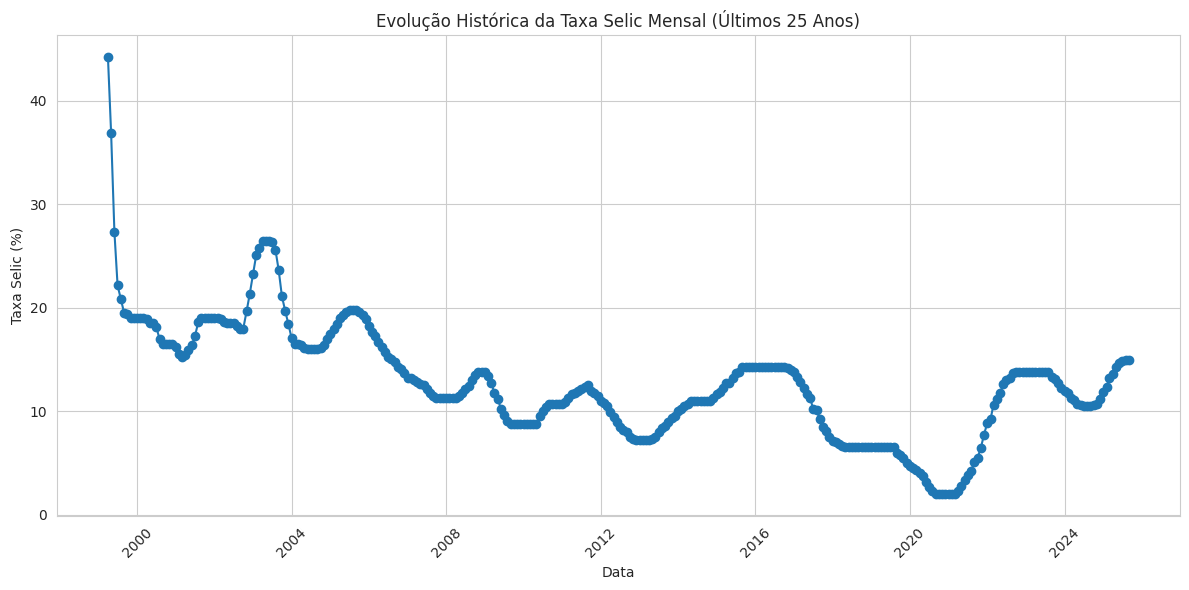

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_selic_monthly.index, df_selic_monthly.values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica da Taxa Selic Mensal (Últimos 25 Anos)')
plt.xlabel('Data')
plt.ylabel('Taxa Selic (%)')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

In [ ]:
# Check the frequency of the index
print("Frequência do índice do DataFrame mensal:")
print(df_selic_monthly.index.freq)

# Check the number of data points in the monthly DataFrame
print("\nNúmero total de pontos de dados no DataFrame mensal:", len(df_selic_monthly))

# Calculate the number of years covered by the data
min_date = df_selic_monthly.index.min()
max_date = df_selic_monthly.index.max()
number_of_years = (max_date.year - min_date.year) + (max_date.month - min_date.month) / 12
print(f"\nPeríodo coberto (aproximado em anos): {number_of_years:.2f}")

# Approximate expected number of monthly points
expected_monthly_points = number_of_years * 12
print(f"Número esperado de pontos mensais (aproximado): {expected_monthly_points:.0f}")

# Check the first and last few rows again to confirm dates
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_selic_monthly.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_selic_monthly.tail())

Frequência do índice do DataFrame mensal:
<MonthEnd>

Número total de pontos de dados no DataFrame mensal: 317

Período coberto (aproximado em anos): 26.33
Número esperado de pontos mensais (aproximado): 316

Primeiras 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Últimas 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
2025-03-31,13.637097
2025-04-30,14.250000
2025-05-31,14.637097
2025-06-30,14.850000
2025-07-31,15.000000


## Salvar dados em JSON

In [ ]:
import json

# Prepare the data for JSON
# The index of df_selic_monthly is the Date, and the values are the Selic rates.
# We need to convert the index (datetime objects) to string format 'YYYY-MM-DD'.
# We also need to rename the value column for clarity in the JSON.

# Create a list of dictionaries, one for each data point
data_list = []
for index, value in df_selic_monthly.items():
    data_list.append({
        "date": index.strftime('%Y-%m-%d'), # Format date as YYYY-MM-DD
        "rate": value # Use the Selic rate value
    })

# Create the final dictionary structure
json_output = {
    "indicatorName": "Taxa SELIC (%)", # Use the indicator name as requested
    "data": data_list
}

# Define the output file path
output_file_path = 'selic-meta-acum-12m.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output, f, indent=4)

print(f"Dados da Taxa Selic mensal formatados e salvos em '{output_file_path}'")

Dados da Taxa Selic mensal formatados e salvos em 'selic_mensal.json'


# Selic Over
Obter a série histórica da Taxa Selic Over (código 11) utilizando o pacote `python-bcb`, combinar os dataframes da Selic Meta e Selic Over, calcular a Selic Over acumulada nos últimos 12 meses, plotar um gráfico com a Selic Meta e Selic Over (mensal) e gerar um arquivo JSON com a Selic Over acumulada em 12 meses.

## Coleta selic over

### Subtask:
Coletar os dados históricos da Taxa Selic Over (código 11) usando o pacote `python-bcb`, similar à coleta da Selic Meta.


In [3]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the series code for Selic Over (Taxa Selic Over / Extramercado)
selic_over_code = 11

# Define the end date as today
end_date = datetime.now()

# Define the start date for the last 30 years (approximately)
# Add a few extra days just in case to ensure the full 30 years are covered,
# considering potential off-by-one errors with leap years or date ranges.
# Changed start date to January 1, 1995 as requested
start_date_overall = datetime(1995, 1, 1)

# List to store dataframes for each 10-year period
dfs_selic_over = []

# Define the period length in years
period_years_over = 10

# Loop through 10-year periods backwards from the end date
current_end_date_over = end_date
while current_end_date_over > start_date_overall:
    # Determine the start date for the current period, ensuring it doesn't go before start_date_overall
    current_start_date_over = max(start_date_overall, current_end_date_over - timedelta(days=period_years_over * 365))

    print(f"Attempting to retrieve Selic Over data from {current_start_date_over.strftime('%Y-%m-%d')} to {current_end_date_over.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the Selic Over series data for the current period
        # Pass the series code as a list of tuples to specify the column name
        df_period_over = sgs.get([('selic_over', selic_over_code)], start=current_start_date_over.strftime('%Y-%m-%d'), end=current_end_date_over.strftime('%Y-%m-%d'))

        if not df_period_over.empty:
            print(f"Selic Over data retrieved for the period: {current_start_date_over.strftime('%Y-%m-%d')} to {current_end_date_over.strftime('%Y-%m-%d')}")
            dfs_selic_over.append(df_period_over)
        else:
            print(f"No Selic Over data retrieved for the period: {current_start_date_over.strftime('%Y-%m-%d')} to {current_end_date_over.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving Selic Over data for the period {current_start_date_over.strftime('%Y-%m-%d')} to {current_end_date_over.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period to be the day before the current period's start date
    current_end_date_over = current_start_date_over - timedelta(days=1)

print(f"Collected {len(dfs_selic_over)} dataframes for different Selic Over periods.")

# Combine all dataframes in the list if the list is not empty
if dfs_selic_over:
    # Concatenate the dataframes and sort the index (dates) to ensure chronological order
    df_selic_over = pd.concat(dfs_selic_over).sort_index()
    print("\nSelic Over dataframes combined successfully!")

    print("\nPrimeiras 5 linhas do DataFrame df_selic_over:")
    display(df_selic_over.head())

    print("\nÚltimas 5 linhas do DataFrame df_selic_over:")
    display(df_selic_over.tail())

    print("\nInformações do DataFrame df_selic_over:")
    df_selic_over.info()

else:
    print("The list of Selic Over dataframes is empty. No data to combine.")
    df_selic_over = None

Attempting to retrieve Selic Over data from 2015-10-15 to 2025-10-12
Selic Over data retrieved for the period: 2015-10-15 to 2025-10-12
Attempting to retrieve Selic Over data from 2005-10-16 to 2015-10-14
Selic Over data retrieved for the period: 2005-10-16 to 2015-10-14
Attempting to retrieve Selic Over data from 1995-10-18 to 2005-10-15
Selic Over data retrieved for the period: 1995-10-18 to 2005-10-15
Attempting to retrieve Selic Over data from 1995-01-01 to 1995-10-17
Selic Over data retrieved for the period: 1995-01-01 to 1995-10-17
Collected 4 dataframes for different Selic Over periods.

Selic Over dataframes combined successfully!

Primeiras 5 linhas do DataFrame df_selic_over:


,selic_over
Date,
1995-01-02,0.154000
1995-01-03,0.153333
1995-01-04,0.153333
1995-01-05,0.153333
1995-01-06,0.153333



Últimas 5 linhas do DataFrame df_selic_over:


,selic_over
Date,
2025-10-06,0.055131
2025-10-07,0.055131
2025-10-08,0.055131
2025-10-09,0.055131
2025-10-10,0.055131



Informações do DataFrame df_selic_over:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7726 entries, 1995-01-02 to 2025-10-10
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   selic_over  7726 non-null   float64
dtypes: float64(1)
memory usage: 120.7 KB


## Calcular selic over acumulada

### Subtask:
Calcular a Selic Over acumulada nos últimos 12 meses.


**Reasoning**:
Calculate the 12-month rolling product of the monthly percentage changes for 'selic_over' to get the accumulated rate.



In [5]:
# Ensure the 'selic_over' column in the original daily dataframe is numeric
df_selic_over['selic_over'] = pd.to_numeric(df_selic_over['selic_over'], errors='coerce')

# Convert the daily rate from % a.d. to a decimal for growth calculation
# If the rate is 0.154 % a.d., the decimal is 0.154 / 100 = 0.00154
df_selic_over['selic_over_daily_decimal'] = df_selic_over['selic_over'] / 100

# Calculate the daily growth factor: 1 + daily decimal rate
df_selic_over['selic_over_daily_growth'] = 1 + df_selic_over['selic_over_daily_decimal']

# --- Modification Start ---
# Calculate the monthly growth factor by taking the product of daily growth factors within each month.
# Then calculate the 12-month rolling product of the monthly growth factors.

# Resample to get the monthly growth factor by multiplying the daily growth factors within each month
# We use .prod() to get the product of growth factors for each month.
monthly_growth_factor = df_selic_over['selic_over_daily_growth'].resample('ME').apply(lambda x: x.prod())

# Calculate the 12-month rolling product of the monthly growth factors
# The window size is 12 for a 12-month rolling product on monthly data.
rolling_12m_growth_factor = monthly_growth_factor.rolling(window=12).apply(lambda x: x.prod(), raw=True)

# Convert the accumulated growth factor back to an accumulated rate (percentage)
df_selic_over_accumulated_12m_monthly = (rolling_12m_growth_factor - 1) * 100

# --- Modification End ---

# Display the head and tail of the accumulated monthly data
print("\nSelic Over Acumulada em 12 meses (calculada mensalmente):")
display(df_selic_over_accumulated_12m_monthly.head(15)) # Display more rows to see the first non-NaN accumulated value
display(df_selic_over_accumulated_12m_monthly.tail())

# Optional: You can now add this series to df_combined if needed for combined visualization or further analysis
# df_combined['selic_over_accumulated_12m'] = df_selic_over_accumulated_12m_monthly


Selic Over Acumulada em 12 meses (calculada mensalmente):


,selic_over_daily_growth
Date,
1995-01-31,NaN
1995-02-28,NaN
1995-03-31,NaN
1995-04-30,NaN
1995-05-31,NaN
1995-06-30,NaN
1995-07-31,NaN
1995-08-31,NaN
1995-09-30,NaN


,selic_over_daily_growth
Date,
2025-06-30,12.143521
2025-07-31,12.553178
2025-08-31,12.884189
2025-09-30,13.314938
2025-10-31,12.769226


## Visualização

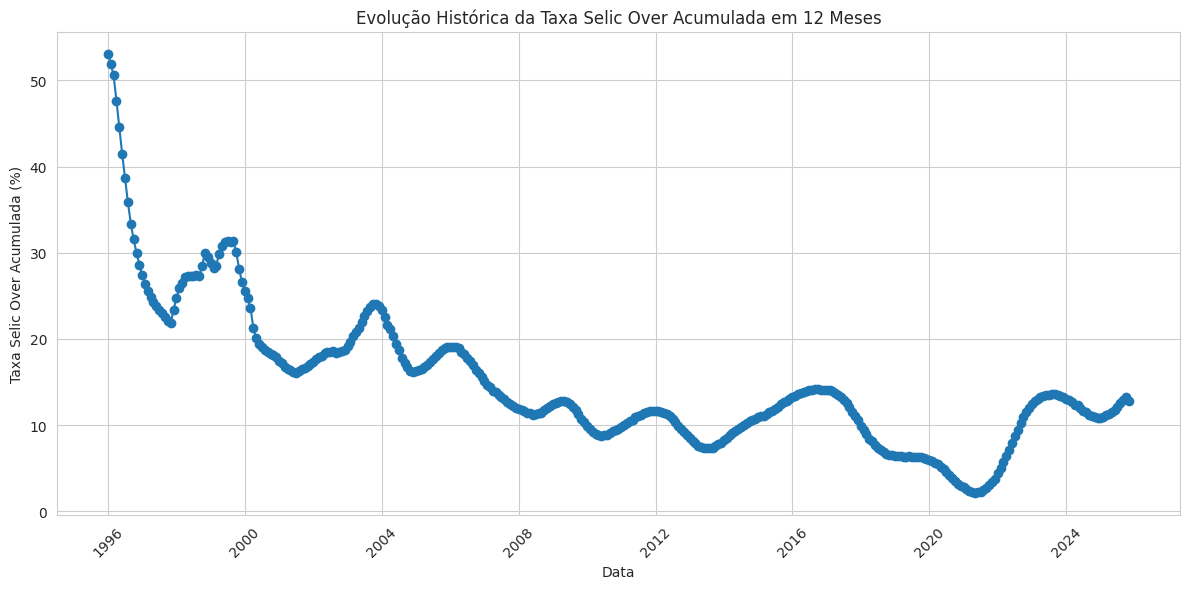

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create the plot for the 12-month accumulated Selic Over
plt.figure(figsize=(12, 6))
# Use the independent calculated accumulated series
plt.plot(df_selic_over_accumulated_12m_monthly.index, df_selic_over_accumulated_12m_monthly.values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica da Taxa Selic Over Acumulada em 12 Meses')
plt.xlabel('Data')
plt.ylabel('Taxa Selic Over Acumulada (%)')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvando JSON

In [8]:
import json

# Prepare the accumulated Selic Over data for JSON
# Use the df_selic_over_accumulated_12m_monthly_independent Series
# The index is the Date, and the values are the accumulated Selic Over rates.

# Create a list of dictionaries, one for each data point
data_list_accumulated = []
for index, value in df_selic_over_accumulated_12m_monthly.items():
    # Exclude NaN values which appear at the beginning of the rolling calculation
    if pd.notna(value):
        data_list_accumulated.append({
            "date": index.strftime('%Y-%m-%d'), # Format date as YYYY-MM-DD
            "rate": value # Use the accumulated Selic Over rate value
        })

# Create the final dictionary structure for the accumulated Selic Over
json_output_accumulated = {
    "indicatorName": "Taxa SELIC Over Acumulada 12 Meses (%)", # Descriptive name for the indicator
    "data": data_list_accumulated
}

# Define the output file path
output_file_path_accumulated = 'selic-over-acum-12m.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path_accumulated, 'w') as f:
    json.dump(json_output_accumulated, f, indent=4)

print(f"Dados da Taxa Selic Over acumulada em 12 meses formatados e salvos em '{output_file_path_accumulated}'")

Dados da Taxa Selic Over acumulada em 12 meses formatados e salvos em 'selic-over-acum-12m.json'


In [9]:
# Display the head of the df_selic_over DataFrame
print("Primeiras 5 linhas do DataFrame df_selic_over:")
display(df_selic_over.head())

# Display the tail of the df_selic_over DataFrame
print("\nÚltimas 5 linhas do DataFrame df_selic_over:")
display(df_selic_over.tail())

# Display information about the df_selic_over DataFrame, including the date range and non-null counts
print("\nInformações do DataFrame df_selic_over:")
df_selic_over.info()

Primeiras 5 linhas do DataFrame df_selic_over:


,selic_over,selic_over_daily_decimal,selic_over_daily_growth,selic_over_accumulated_12m_daily_independent
Date,,,,
1995-01-02,0.154000,0.001540,1.001540,NaN
1995-01-03,0.153333,0.001533,1.001533,NaN
1995-01-04,0.153333,0.001533,1.001533,NaN
1995-01-05,0.153333,0.001533,1.001533,NaN
1995-01-06,0.153333,0.001533,1.001533,NaN



Últimas 5 linhas do DataFrame df_selic_over:


,selic_over,selic_over_daily_decimal,selic_over_daily_growth,selic_over_accumulated_12m_daily_independent
Date,,,,
2025-10-06,0.055131,0.000551,1.000551,18.594223
2025-10-07,0.055131,0.000551,1.000551,18.611961
2025-10-08,0.055131,0.000551,1.000551,18.629702
2025-10-09,0.055131,0.000551,1.000551,18.647446
2025-10-10,0.055131,0.000551,1.000551,18.665192



Informações do DataFrame df_selic_over:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7726 entries, 1995-01-02 to 2025-10-10
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   selic_over                                    7726 non-null   float64
 1   selic_over_daily_decimal                      7726 non-null   float64
 2   selic_over_daily_growth                       7726 non-null   float64
 3   selic_over_accumulated_12m_daily_independent  7362 non-null   float64
dtypes: float64(4)
memory usage: 301.8 KB


## Verificando lacunas

In [ ]:
# Check for gaps in the daily Selic Over data
# We can look for jumps in the index that are larger than a few days,
# accounting for weekends and holidays. A gap of more than a week is likely a data gap.

print("Verificando lacunas no DataFrame df_selic_over:")

# Get the dates from the index
dates = df_selic_over.index

# Calculate the difference between consecutive dates in days
date_diffs = (dates[1:] - dates[:-1]).days

# Find where the difference is significantly larger than expected for consecutive business days
# A normal gap is 1 day (weekday to weekday), 3 days (Friday to Monday), or 4 days (Thursday to Monday with a holiday)
# Let's consider a gap larger than 7 days as a potential data gap
potential_gaps_indices = date_diffs > 7

# Get the dates where potential gaps start and end
gap_start_dates = dates[:-1][potential_gaps_indices]
gap_end_dates = dates[1:][potential_gaps_indices]

if len(gap_start_dates) > 0:
    print("\nLacunas identificadas no DataFrame df_selic_over:")
    for start, end in zip(gap_start_dates, gap_end_dates):
        print(f"  Início da lacuna: {start.strftime('%Y-%m-%d')}, Fim da lacuna (início dos dados seguintes): {end.strftime('%Y-%m-%d')}")
else:
    print("\nNenhuma lacuna significativa (maior que 7 dias) encontrada no DataFrame df_selic_over.")

# Also, explicitly state the first and last date in the dataframe
print(f"\nPrimeira data no DataFrame df_selic_over: {df_selic_over.index.min().strftime('%Y-%m-%d')}")
print(f"Última data no DataFrame df_selic_over: {df_selic_over.index.max().strftime('%Y-%m-%d')}")

Verificando lacunas no DataFrame df_selic_over:

Lacunas identificadas no DataFrame df_selic_over:
  Início da lacuna: 1995-08-16, Fim da lacuna (início dos dados seguintes): 2005-08-15

Primeira data no DataFrame df_selic_over: 1995-01-02
Última data no DataFrame df_selic_over: 2025-08-08




```
# Isto está formatado como código
```

# Atualização dos Dados

# Task
Verificar se o arquivo "selic-over-acum-12m.json" existe, obter a data do último indicador, coletar os dados da Selic Over desde a data do último indicador até a data atual, calcular a Selic Over acumulada em 12 meses para os novos dados, combinar com os dados existentes e atualizar o arquivo "selic-over-acum-12m.json".

## Verificar a existência do arquivo json

### Subtask:
Verificar se o arquivo `selic-over-acum-12m.json` já existe no ambiente.


**Reasoning**:
Verify the existence of the specified JSON file using the `os` module.



In [1]:
import os

# Define the file path
file_path = 'selic-over-acum-12m.json'

# Check if the file exists
file_exists = os.path.exists(file_path)

# Print the result of the check
print(f"O arquivo '{file_path}' existe: {file_exists}")

O arquivo 'selic-over-acum-12m.json' existe: True


## Obter a data do último indicador no json (se existir)

### Subtask:
Se o arquivo `selic-over-acum-12m.json` existir, carregar o conteúdo e identificar a data do indicador mais recente presente no arquivo.


**Reasoning**:
Load the existing JSON data if the file exists and extract the last indicator date, otherwise set a default start date.



In [3]:
import json
from datetime import datetime

if file_exists:
    try:
        with open(file_path, 'r') as f:
            json_data = json.load(f)

        # Access the 'data' key and check if it's not empty
        if json_data and 'data' in json_data and json_data['data']:
            # Get the last dictionary in the list
            last_entry = json_data['data'][-1]
            # Extract the date string and convert to datetime object
            date_str = last_entry.get('date')
            if date_str:
                last_indicator_date = datetime.strptime(date_str, '%Y-%m-%d')
            else:
                # If 'date' key is missing in the last entry, fall back to default
                print("Warning: 'date' key not found in the last entry of the JSON data. Using default start date.")
                last_indicator_date = datetime(1995, 1, 1)
        else:
            # If 'data' list is empty or not present, fall back to default
            print("Warning: JSON data or 'data' list is empty or missing. Using default start date.")
            last_indicator_date = datetime(1995, 1, 1)

    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {file_path}. Using default start date.")
        last_indicator_date = datetime(1995, 1, 1)
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}. Using default start date.")
        last_indicator_date = datetime(1995, 1, 1)
else:
    print(f"File '{file_path}' does not exist. Using default start date.")
    last_indicator_date = datetime(1995, 1, 1)

print(f"Last indicator date in the existing data (or default start date): {last_indicator_date.strftime('%Y-%m-%d')}")

Last indicator date in the existing data (or default start date): 2025-08-31


## Coletar os dados mais recentes da selic over

### Subtask:
Usar o pacote `python-bcb` para obter os dados diários da Selic Over a partir do dia seguinte à última data encontrada no JSON (ou a partir da data inicial definida, se o arquivo não existir) até a data atual.


**Reasoning**:
Use the bcb package to collect daily Selic Over data from the day after the last indicator date (or the default start date) until today's date.



In [6]:
%pip install python-bcb

**Reasoning**:
The `python-bcb` package should now be installed. Retry the code to import the necessary libraries and collect the new Selic Over data.



In [7]:
from datetime import datetime, timedelta
from bcb import sgs
import pandas as pd

# Define the series code for Selic Over (Taxa Selic Over / Extramercado)
selic_over_code = 11

# Calculate the start date for the new data collection
# If the file existed and the last indicator date is not the default start date,
# start collection from the day after the last indicator date.
# Otherwise, start from the default start date.
default_start_date = datetime(1995, 1, 1)

# Check if file_exists and last_indicator_date are defined (from previous steps)
# If not, assume file_exists is False and last_indicator_date is the default
try:
    file_exists
except NameError:
    file_exists = False
    print("Variable 'file_exists' not found. Assuming file did not exist.")

try:
    last_indicator_date
except NameError:
    last_indicator_date = default_start_date
    print("Variable 'last_indicator_date' not found. Using default start date.")


if file_exists and last_indicator_date != default_start_date:
    # Start collecting from the day after the last indicator date
    start_date_new_data = last_indicator_date + timedelta(days=1)
else:
    # If file doesn't exist or last indicator date is the default, start from default
    start_date_new_data = default_start_date

# Define the end date for the new data collection as today
end_date_new_data = datetime.now()

# Ensure the start date is not after the end date
if start_date_new_data > end_date_new_data:
    print("Start date is after the end date. No new data to collect.")
    df_new_selic_over = pd.DataFrame() # Create an empty DataFrame
else:
    print(f"Attempting to retrieve new Selic Over data from {start_date_new_data.strftime('%Y-%m-%d')} to {end_date_new_data.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the Selic Over series data
        # Pass the series code as a list of tuples to specify the column name
        df_new_selic_over = sgs.get([('selic_over', selic_over_code)],
                                    start=start_date_new_data.strftime('%Y-%m-%d'),
                                    end=end_date_new_data.strftime('%Y-%m-%d'))

        print(f"Retrieved {len(df_new_selic_over)} rows of new Selic Over data.")

        if not df_new_selic_over.empty:
            print("\nPrimeiras 5 linhas do DataFrame df_new_selic_over:")
            display(df_new_selic_over.head())

            print("\nÚltimas 5 linhas do DataFrame df_new_selic_over:")
            display(df_new_selic_over.tail())

            print("\nInformações do DataFrame df_new_selic_over:")
            df_new_selic_over.info()
        else:
            print("No new data retrieved for the specified period.")

    except Exception as e:
        print(f"An error occurred while retrieving new Selic Over data: {e}")
        df_new_selic_over = pd.DataFrame() # Ensure df_new_selic_over is defined even on error

Attempting to retrieve new Selic Over data from 2025-09-01 to 2025-10-11
Retrieved 30 rows of new Selic Over data.

Primeiras 5 linhas do DataFrame df_new_selic_over:


,selic_over
Date,
2025-09-01,0.055131
2025-09-02,0.055131
2025-09-03,0.055131
2025-09-04,0.055131
2025-09-05,0.055131



Últimas 5 linhas do DataFrame df_new_selic_over:


,selic_over
Date,
2025-10-06,0.055131
2025-10-07,0.055131
2025-10-08,0.055131
2025-10-09,0.055131
2025-10-10,0.055131



Informações do DataFrame df_new_selic_over:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2025-09-01 to 2025-10-10
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   selic_over  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


## Calcular a selic over acumulada em 12 meses para os novos dados

### Subtask:
Aplicar o cálculo da Selic Over acumulada em 12 meses nos dados diários recém-coletados.


**Reasoning**:
Apply the steps to calculate the 12-month accumulated Selic Over rate from the newly collected daily data.



In [8]:
# 1. Ensure the 'selic_over' column in df_new_selic_over is numeric
df_new_selic_over['selic_over'] = pd.to_numeric(df_new_selic_over['selic_over'], errors='coerce')

# 2. Convert the daily percentage rate to a decimal
df_new_selic_over['selic_over_daily_decimal'] = df_new_selic_over['selic_over'] / 100

# 3. Calculate the daily growth factor
df_new_selic_over['selic_over_daily_growth'] = 1 + df_new_selic_over['selic_over_daily_decimal']

# 4. Calculate the 12-month rolling product of the daily growth factor
# Use a window size of 365 days as a rough approximation for 12 months of daily data.
window_size_days = 365 # Approximate number of days in a year

# The rolling product of the daily growth factors over 365 days
df_new_selic_over['selic_over_accumulated_12m_daily'] = df_new_selic_over['selic_over_daily_growth'].rolling(window=window_size_days).apply(lambda x: x.prod(), raw=True)

# 5. Convert the accumulated growth factor back to a percentage rate
df_new_selic_over['selic_over_accumulated_12m_daily'] = (df_new_selic_over['selic_over_accumulated_12m_daily'] - 1) * 100

# 6. Resample the daily accumulated rate to a monthly frequency, taking the last value
selic_over_accumulated_12m_monthly_new = df_new_selic_over['selic_over_accumulated_12m_daily'].resample('ME').last()

# 7. Display the head and tail of the resulting monthly accumulated Selic Over Series
print("\nSelic Over Acumulada em 12 meses (calculada independentemente a partir de novos dados diários % a.d.):")
display(selic_over_accumulated_12m_monthly_new.head(15)) # Display more rows to see the first non-NaN accumulated value
display(selic_over_accumulated_12m_monthly_new.tail())



Selic Over Acumulada em 12 meses (calculada independentemente a partir de novos dados diários % a.d.):


,selic_over_accumulated_12m_daily
Date,
2025-09-30,NaN
2025-10-31,NaN


,selic_over_accumulated_12m_daily
Date,
2025-09-30,NaN
2025-10-31,NaN


## Combinar os novos dados acumulados com os dados existentes no json

### Subtask:
Juntar os novos dados acumulados (convertidos para o formato JSON) com os dados já presentes no arquivo JSON.


**Reasoning**:
Convert the new accumulated data to a list of dictionaries, combine it with the existing JSON data, sort by date, and update the json_data variable.



# Task
Update the "selic-meta-acum-12m.json" file with the latest Selic Meta data from the BCB API, starting from the day after the last recorded date in the file (or a default start date if the file doesn't exist) up to the current date.

## Verify file existence

### Subtask:
Verificar se o arquivo `selic-meta-acum-12m.json` existe no ambiente.


**Reasoning**:
Verify the existence of the specified JSON file using the `os` module.



In [10]:
import os

# Define the file path
file_path = 'selic-meta-acum-12m.json'

# Check if the file exists
file_exists = os.path.exists(file_path)

# Print the result of the check
print(f"O arquivo '{file_path}' existe: {file_exists}")

O arquivo 'selic-meta-acum-12m.json' existe: True


**Reasoning**:
The previous step confirmed the file exists. Now, load the JSON data from the file and extract the date of the last indicator. If the file doesn't exist or is empty/invalid, set a default start date.



In [12]:
import json
from datetime import datetime

if file_exists:
    try:
        with open(file_path, 'r') as f:
            json_data = json.load(f)

        # Access the 'data' key and check if it's not empty
        if json_data and 'data' in json_data and json_data['data']:
            # Get the last dictionary in the list
            last_entry = json_data['data'][-1]
            # Extract the date string and convert to datetime object
            date_str = last_entry.get('date')
            if date_str:
                last_indicator_date = datetime.strptime(date_str, '%Y-%m-%d')
            else:
                # If 'date' key is missing in the last entry, fall back to default
                print("Warning: 'date' key not found in the last entry of the JSON data. Using default start date.")
                last_indicator_date = datetime(1995, 1, 1) # Using a default start date as defined previously
        else:
            # If 'data' list is empty or not present, fall back to default
            print("Warning: JSON data or 'data' list is empty or missing. Using default start date.")
            last_indicator_date = datetime(1995, 1, 1) # Using a default start date
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {file_path}. Using default start date.")
        last_indicator_date = datetime(1995, 1, 1) # Using a default start date
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}. Using default start date.")
        last_indicator_date = datetime(1995, 1, 1) # Using a default start date
else:
    # This case should ideally not be reached if file_exists is True, but included for robustness
    print(f"File '{file_path}' does not exist. Using default start date.")
    last_indicator_date = datetime(1995, 1, 1) # Using a default start date

print(f"Last indicator date in the existing data (or default start date): {last_indicator_date.strftime('%Y-%m-%d')}")


Last indicator date in the existing data (or default start date): 2025-07-31


**Reasoning**:
Use the bcb package to collect daily Selic Meta data from the day after the last indicator date until today's date.



In [14]:
from datetime import datetime, timedelta
from bcb import sgs
import pandas as pd

# Define the series code for Selic Meta
selic_meta_code = 432

# Calculate the start date for the new data collection
# Start collecting from the day after the last indicator date
start_date_new_data = last_indicator_date + timedelta(days=1)

# Define the end date for the new data collection as today
# Use datetime.today() to avoid potential issues with timezones or future timestamps
end_date_new_data = datetime.today()

# Ensure the start date is not after the end date
if start_date_new_data > end_date_new_data:
    print("Start date is after the end date. No new data to collect.")
    df_new_selic_meta = pd.DataFrame() # Create an empty DataFrame
else:
    print(f"Attempting to retrieve new Selic Meta data from {start_date_new_data.strftime('%Y-%m-%d')} to {end_date_new_data.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the Selic Meta series data
        # Pass the series code as a list of tuples to specify the column name
        df_new_selic_meta = sgs.get([('selic', selic_meta_code)],
                                    start=start_date_new_data.strftime('%Y-%m-%d'),
                                    end=end_date_new_data.strftime('%Y-%m-%d'))

        print(f"Retrieved {len(df_new_selic_meta)} rows of new Selic Meta data.")

        if not df_new_selic_meta.empty:
            print("\nPrimeiras 5 linhas do DataFrame df_new_selic_meta:")
            display(df_new_selic_meta.head())

            print("\nÚltimas 5 linhas do DataFrame df_new_selic_meta:")
            display(df_new_selic_meta.tail())

            print("\nInformações do DataFrame df_new_selic_meta:")
            df_new_selic_meta.info()
        else:
            print("No new data retrieved for the specified period.")

    except Exception as e:
        print(f"An error occurred while retrieving new Selic Meta data: {e}")
        df_new_selic_meta = pd.DataFrame() # Ensure df_new_selic_meta is defined even on error

Attempting to retrieve new Selic Meta data from 2025-08-01 to 2025-10-12
Retrieved 73 rows of new Selic Meta data.

Primeiras 5 linhas do DataFrame df_new_selic_meta:


,selic
Date,
2025-08-01,15
2025-08-02,15
2025-08-03,15
2025-08-04,15
2025-08-05,15



Últimas 5 linhas do DataFrame df_new_selic_meta:


,selic
Date,
2025-10-08,15
2025-10-09,15
2025-10-10,15
2025-10-11,15
2025-10-12,15



Informações do DataFrame df_new_selic_meta:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2025-08-01 to 2025-10-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   selic   73 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


**Reasoning**:
Calculate the 12-month accumulated Selic Meta rate from the newly collected daily data and resample to monthly frequency.



**Reasoning**:
Combine the newly collected daily Selic Meta data with the existing historical data and then resample to monthly frequency, taking the last value of each month.

In [25]:
df_selic_monthly = df_new_selic_meta['selic'].resample('ME').mean()

# Display basic information about the monthly DataFrame
print("Informações do DataFrame mensal consolidado:")
df_selic_monthly.info()

# Display descriptive statistics for the monthly Selic rate
print("\nEstatísticas Descritivas da Taxa Selic Mensal:")
print(df_selic_monthly.describe())

# Check the date range of the monthly data
min_date_monthly = df_selic_monthly.index.min()
max_date_monthly = df_selic_monthly.index.max()
print(f"\nPeríodo dos dados mensais: {min_date_monthly.strftime('%Y-%m-%d')} a {max_date_monthly.strftime('%Y-%m-%d')}")

# Display the first and last few rows of the monthly data
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_selic_monthly.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_selic_monthly.tail())

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 3 entries, 2025-08-31 to 2025-10-31
Freq: ME
Series name: selic
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 48.0 bytes

Estatísticas Descritivas da Taxa Selic Mensal:
count     3.0
mean     15.0
std       0.0
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: selic, dtype: float64

Período dos dados mensais: 2025-08-31 a 2025-10-31

Primeiras 5 linhas do DataFrame mensal:


,selic
Date,
2025-08-31,15.0
2025-09-30,15.0
2025-10-31,15.0



Últimas 5 linhas do DataFrame mensal:


,selic
Date,
2025-08-31,15.0
2025-09-30,15.0
2025-10-31,15.0


## Atualizar o arquivo json

### Subtask:
Salvar os dados da Selic Meta acumulada em 12 meses no arquivo `selic-meta-acum-12m.json`.

**Reasoning**:
Save the calculated Selic Meta accumulated 12-month data to the specified JSON file.

In [28]:
import json
import pandas as pd

# Define the output file path
output_file_path = 'selic-meta-acum-12m.json'

# Load existing data from the JSON file if it exists
existing_data = []
if os.path.exists(output_file_path):
    try:
        with open(output_file_path, 'r') as f:
            json_content = json.load(f)
            if json_content and 'data' in json_content:
                existing_data = json_content['data']
            print(f"Existing data loaded from '{output_file_path}'.")
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {output_file_path}. Starting with empty existing data.")
    except Exception as e:
        print(f"An unexpected error occurred while loading '{output_file_path}': {e}. Starting with empty existing data.")
else:
    print(f"File '{output_file_path}' not found. Starting with empty existing data.")


# Convert existing data (list of dicts) to a DataFrame
# Ensure the 'date' column is treated as datetime and set as index
df_existing = pd.DataFrame(existing_data)
if not df_existing.empty:
    df_existing['date'] = pd.to_datetime(df_existing['date'])
    df_existing.set_index('date', inplace=True)
    # Rename the value column to match the new data if necessary, assuming 'rate' in existing JSON
    if 'rate' in df_existing.columns:
         df_existing.rename(columns={'rate': 'selic'}, inplace=True)
    # Ensure only the 'selic' column is kept for concatenation
    df_existing = df_existing[['selic']]
    print("Existing data converted to DataFrame.")
    display(df_existing.head())
else:
     print("Existing data is empty or could not be loaded into a DataFrame.")
     # Create an empty DataFrame with the correct column name if no existing data
     df_existing = pd.DataFrame(columns=['selic'])
     df_existing.index.name = 'date' # Ensure index name is consistent


# Combine the existing and new monthly data
# The new monthly data is already in df_selic_monthly (a Series)
# Convert the Series to a DataFrame for concatenation
df_new_monthly = df_selic_monthly.to_frame(name='selic')

# Concatenate the dataframes, handling potential overlaps by keeping the new data
# Sort the index to ensure chronological order
df_combined_monthly_selic_meta = pd.concat([df_existing, df_new_monthly]).sort_index()

# Remove duplicate index entries, keeping the last occurrence (which would be from the new data)
df_combined_monthly_selic_meta = df_combined_monthly_selic_meta[~df_combined_monthly_selic_meta.index.duplicated(keep='last')]

print("\nCombined monthly Selic Meta data:")
display(df_combined_monthly_selic_meta.head())
display(df_combined_monthly_selic_meta.tail())
df_combined_monthly_selic_meta.info()


# Prepare the combined data for JSON output
# Convert the DataFrame back to a list of dictionaries
combined_monthly_selic_meta_data = []
for index, row in df_combined_monthly_selic_meta.iterrows():
    combined_monthly_selic_meta_data.append({
        "date": index.strftime('%Y-%m-%d'), # Format date as YYYY-MM-DD
        "rate": row['selic'] # Use the Selic rate value
    })

# Create the final dictionary structure for the JSON
json_output = {
    "indicatorName": "Taxa SELIC Mensal (%)", # Indicator name (adjust if necessary)
    "data": combined_monthly_selic_meta_data
}

# Save the dictionary to a JSON file with indentation for readability
try:
    with open(output_file_path, 'w') as f:
        json.dump(json_output, f, indent=4)
    print(f"\nArquivo '{output_file_path}' atualizado com sucesso.")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o arquivo '{output_file_path}': {e}")

Existing data loaded from 'selic-meta-acum-12m.json'.
Existing data converted to DataFrame.


,selic
date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Combined monthly Selic Meta data:


,selic
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839


,selic
2025-06-30,14.85
2025-07-31,15.00
2025-08-31,15.00
2025-09-30,15.00
2025-10-31,15.00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 1999-03-31 to 2025-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   320 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB

Arquivo 'selic-meta-acum-12m.json' atualizado com sucesso.
